Escriba un programa que encuentre la senda óptima de Ct y At de Leo Messi a lo largo de su vida, dadas unas sendas de ingreso Y, un valor para la tasa de interés bruta R y un valor de phi.

In [1]:
#Importamos las librerías necesarias
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
import operator
import scipy
import random

In [2]:
## Inicialización de las variables
beta   = 0.98   # Factor de descuento de Leo
sigma  = 1.5      # Coeficiente de aversion al riesgo de Messi
T      = 70     # Horizonte de vida que le queda a la pulga
A_0=np.array([0])      # Valor inicial de sus activos
A_T=np.array([0])      # Herencia que deja Leo a Thiago Messi

In [3]:
R1 = 1/beta-0.02 # Perfil de consumo creciente (Se endeuda)
R2 = 1/beta+0.02 # Perfil de consumo decreciente (Ahorra)
R3 = 1/beta      # Perfil de consumo constante a traves del tiempo

In [4]:
## Creamos un Vector de los ingresos de Leo
Y=np.ones(T+1)

In [5]:
# Descomente el siguiente bloque para simular un proceso de ingreso mas
# complicado donde el FC Barcelona sube a Leo su sueldo anualmente
g = 0.04 # Tasa de crecimiento del ingreso
for i in range(1,T+1):
    Y[i]=(1+g)*Y[i-1]

for t in range(40,T+1): #Asumimos que se retira a los 40
       Y[t]=0            

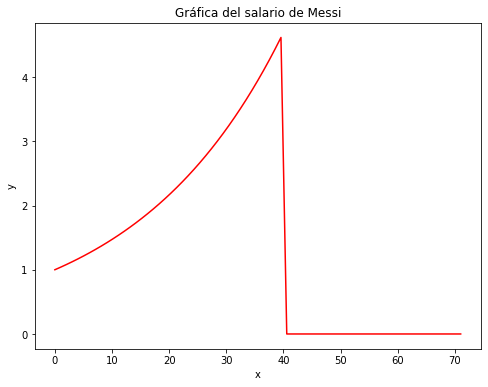

In [11]:
# get 10 linearly spaced points in the interval [0, 5)
x = np.linspace(0, T+1, T+1)
y = Y

# create a figure/canvas of desired size
plt.figure(figsize=(8, 6))

# plot values; with a color `red`
plt.plot(x, y, 'r')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Gráfica del salario de Messi")
plt.savefig("1_Salario_Messi.pdf", format='pdf', dpi=80)
plt.show()


In [12]:
#Definimos la función de utilidad instantánea de Messi
def ut(C):
    if (sigma==1):
        utilidad=np.log(C)
    else:
        utilidad=(C**(1-sigma)-1)/(1-sigma)
    return (utilidad)

In [13]:
#Función objetivo de Messi
## Funcion objetivo de Leo

def messi_func(A_vec):
    A_vec_lag = np.append(A_0,A_vec) # Vector con el rezago de los acivos
    A_vec = np.append(A_vec,A_T) # Vector de activos
    C_vec = R1*A_vec_lag+Y-A_vec # Vector de consumo en cada periodo
    beta_vec = beta**np.arange(0,T+1)  # Vector con tasas de descuento
    bienestar = sum(beta_vec*ut(C_vec))
    
    return(-bienestar)

In [14]:
## Problema de ahorro óptimo de Leo Messi: Solucion cuando sigma=1
sigma=1
Y_bar=sum(Y/(R1**np.arange(0,T+1))) #Esto es el valor presente del ingreso de Leo

# Consumo

C0=((1-beta)/(1-beta**(T+1)))*Y_bar
C_initval=((beta*R1)**np.arange(0,T+1))*C0

#Activos
A_initval=np.ones(T) #Creamos el vector de activos iniciales una lista vacía
A_initval[0] = R1*A_0+Y[0]-C_initval[0]

A_initval[0]=R1*A_0+Y[0]-C_initval[0] #El vector inicial en su primera posición es
#El vector de activos iniciales mas los ingresos menos los consumos iniciales

for t in range(1,T):
    A_initval[t]=R1*A_initval[t-1]+Y[t]-C_initval[t]
    
#El vector de activos desde el segundo período hasta uno antes de su
#muerte, es la tasa de interes de sus activos del período pasado, más
#los ingresos del período correspondiente menos sus consumos

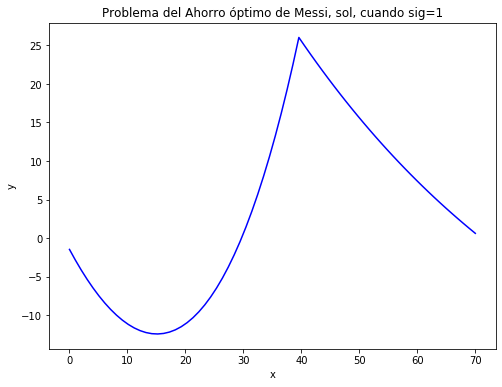

In [16]:
# GRAFICA DEL PROBLEMA DE OPTIMIZACIÓN
x = np.linspace(0, T, T)
y = A_initval

# create a figure/canvas of desired size
plt.figure(figsize=(8, 6))

# plot values; with a color `red`
plt.plot(x, y, 'b')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Problema del Ahorro óptimo de Messi, sol, cuando sig=1")
plt.savefig("2_Ahorro_Optimo.pdf", format='pdf', dpi=80)
plt.show()

In [17]:
#Importamos scipy y usamos import minimize para importar el método que minimiza funciones
from scipy.optimize import minimize
from scipy.optimize import fmin
## Problema de ahorro óptimo de Leo Messi: Solucion cuando sigma!=1

# Cuando sigma no es 1, debemos acudir a un algoritmo de optimizacion para 
# encontrar una solucion numerica

# Ahora usaremos la solucion particular como valor inicial

X0=A_initval #Damos un valor inicial al vector de activos
resultados=minimize(messi_func,X0).x #Generamos resultados 
resultados=np.append(resultados,A_T) #Generamos un vector de optimos

#Veamos el consumo de Leo
consumo=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

for t in range(T):
    if (t==0):
        consumo[0] = A_0*R1+Y[0]-resultados[0]

    else:
        consumo[t] = resultados[t-1]*R1+Y[t]-resultados[t]

#Consumo de Messi para los 70 períodos, si estamos en el período 
#inicial, entonces el consumo, es el vector de activos iniciales
#En su valor presente, más los ingresos en ese período, menos 
#El vector de optimos del resultado de la minimización de la función

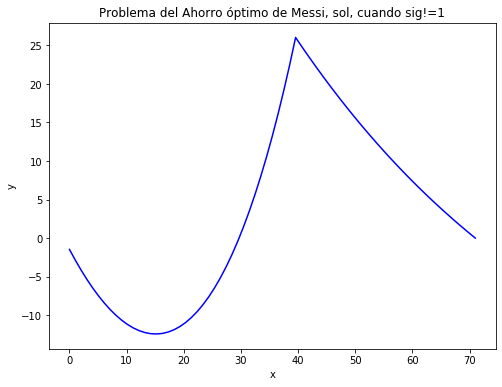

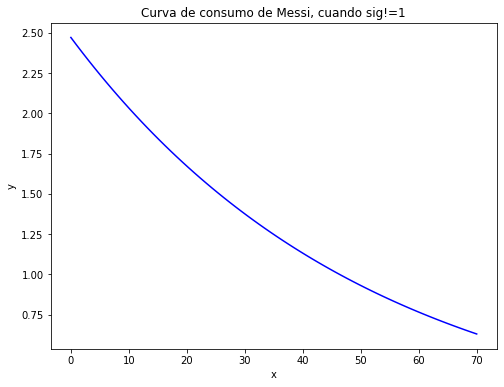

In [18]:
#Gráfica del consumo de Messi

# GRAFICA DEL PROBLEMA DE OPTIMIZACIÓN
x = np.linspace(0, T+1, T+1)
y = resultados

# create a figure/canvas of desired size
plt.figure(figsize=(8, 6))

# plot values; with a color `red`
plt.plot(x, y, 'b')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Problema del Ahorro óptimo de Messi, sol, cuando sig!=1")
plt.savefig("3_Problema_del_ahorro_optimo.pdf", format='pdf', dpi=80)
plt.show()

# GRAFICA DEL PROBLEMA DE OPTIMIZACIÓN
x = np.linspace(0, T, T)
y = consumo

# create a figure/canvas of desired size
plt.figure(figsize=(8, 6))

# plot values; with a color `red`
plt.plot(x, y, 'b')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Curva de consumo de Messi, cuando sig!=1")
plt.savefig("4_Curva_de_consumo.pdf", format='pdf', dpi=80)
plt.show()

In [19]:
# Problema de Ahorro de Messi, solucion con restricciones de deuda

# Supongamos ahora que el malvado gobierno espanol,al servicio del Real
#Madrid, decide atacar a Leo con un proceso por fraude fiscal. 
# Esto impide al mejor de la historia contraer deudas por encima de 
#un umbral A_bound, incluso con su amigo Mascherano

# Por lo anterior, At>=A_bound en todo periodo

A_bound = 0

x0=np.ones(len(A_initval))

for i in range(len(A_initval)):
    x0[i]=max(A_bound,A_initval[i])
    
li = np.repeat(A_bound,len(x0))    
ls=np.repeat(None,len(x0))
lims=np.vstack((li,ls)).T


resultados2= minimize(messi_func,x0, method="L-BFGS-B", bounds= lims).x
resultados2= np.append(resultados2,A_T)

#Veamos el consumo de Messi

consumo2=np.ones(T)

for t in range(0,T):
    if (t==0):
        consumo2[0] = A_0*R1+Y[0]-resultados2[0]
    else:
        consumo2[t] = resultados2[t-1]*R1+Y[t]-resultados2[t]

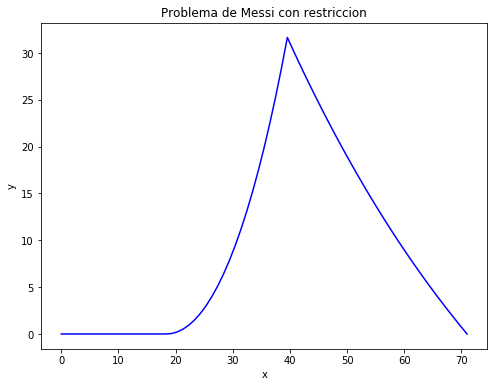

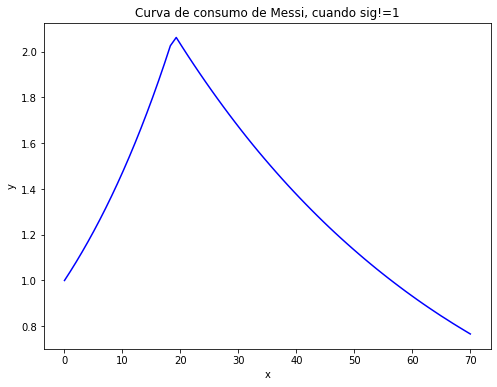

In [20]:
##Gráfica del problema

#Gráfica del consumo de Messi

# GRAFICA DEL PROBLEMA DE OPTIMIZACIÓN
x = np.linspace(0, T+1, T+1)
y = resultados2

# create a figure/canvas of desired size
plt.figure(figsize=(8, 6))

# plot values; with a color `red`
plt.plot(x, y, 'b')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Problema de Messi con restriccion")
plt.savefig("5_Problema_con_restriccion.pdf", format='pdf', dpi=80)
plt.show()

# GRAFICA DEL PROBLEMA DE OPTIMIZACIÓN
x = np.linspace(0, T, T)
y = consumo2

# create a figure/canvas of desired size
plt.figure(figsize=(8, 6))

# plot values; with a color `red`
plt.plot(x, y, 'b')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Curva de consumo de Messi, cuando sig!=1")
plt.savefig("6_Nueva_curva_de_consumo.pdf", format='pdf', dpi=80)
plt.show()


Asuma que Yt = Y = 1 para todo t y que phi tiende a infinito. En una misma gráfica, muestre las sendas
de Ct y At cuando
A. R = 1/beta 
B. R = 1/beta -0.02
C. R = 1/beta + 0:02

In [21]:
#Importamos scipy y usamos import minimize para importar el método que minimiza funciones
from scipy.optimize import minimize
from scipy.optimize import fmin
## Problema de ahorro óptimo de Leo Messi: Solucion cuando sigma!=1

# Cuando sigma no es 1, debemos acudir a un algoritmo de optimizacion para 
# encontrar una solucion numerica

# Ahora usaremos la solucion particular como valor inicial

X0=A_initval #Damos un valor inicial al vector de activos
resultados=minimize(messi_func,X0).x #Generamos resultados 
resultados=np.append(resultados,A_T) #Generamos un vector de optimos

#Veamos el consumo de Leo
consumoa=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

for t in range(T):
    if (t==0):
        consumoa[0] = A_0*R3+Y[0]-resultados[0]

    else:
        consumoa[t] = resultados[t-1]*R3+Y[t]-resultados[t]

#Consumo de Messi para los 70 períodos, si estamos en el período 
#inicial, entonces el consumo, es el vector de activos iniciales
#En su valor presente, más los ingresos en ese período, menos 
#El vector de optimos del resultado de la minimización de la función

consumob=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

for t in range(T):
    if (t==0):
        consumob[0] = A_0*R1+Y[0]-resultados[0]

    else:
        consumob[t] = resultados[t-1]*R1+Y[t]-resultados[t]

consumoc=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

for t in range(T):
    if (t==0):
        consumoc[0] = A_0*R2+Y[0]-resultados[0]

    else:
        consumoc[t] = resultados[t-1]*R2+Y[t]-resultados[t]

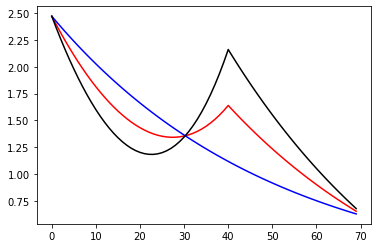

In [23]:
plt.plot(consumoa,'red')
plt.plot(consumob,'blue')
plt.plot(consumoc,'black')
plt.savefig("7_Varios_Consumos.pdf", format='pdf', dpi=80)

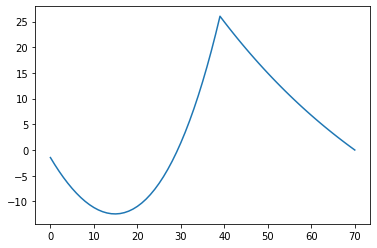

In [24]:
#Senda del ahorro 
plt.plot(resultados)
plt.savefig("8_Senda_del_ahorro.pdf", format='pdf', dpi=80)

Asuma que Argentina ha declarado default (como siempre), por lo que Leo ya no cuenta con acceso a los mercados de deuda. Esto es, phi = 0. Asuma de nuevo que Yt = Y = 1 y muestre,
en una misma gráfica, las sendas de Ct y At cuando
(A) R = 1 / beta
(B) R = 1/beta -0.02
(C) R = 1/beta +0.02

In [25]:
A_bound = 0

x0=np.ones(len(A_initval))

for i in range(len(A_initval)):
    x0[i]=max(A_bound,A_initval[i])
    
li = np.repeat(A_bound,len(x0))    
ls=np.repeat(None,len(x0))
lims=np.vstack((li,ls)).T


resultados2= minimize(messi_func,x0, method="L-BFGS-B", bounds= lims).x
resultados2= np.append(resultados2,A_T)

#Veamos el consumo de Messi

consumo2a=np.ones(T)

for t in range(0,T):
    if (t==0):
        consumo2a[0] = A_0*R3+Y[0]-resultados2[0]
    else:
        consumo2a[t] = resultados2[t-1]*R3+Y[t]-resultados2[t]

consumo2b=np.ones(T)

for t in range(0,T):
    if (t==0):
        consumo2b[0] = A_0*R1+Y[0]-resultados2[0]
    else:
        consumo2b[t] = resultados2[t-1]*R1+Y[t]-resultados2[t]        
        
consumo2c=np.ones(T)

for t in range(0,T):
    if (t==0):
        consumo2c[0] = A_0*R2+Y[0]-resultados2[0]
    else:
        consumo2c[t] = resultados2[t-1]*R2+Y[t]-resultados2[t]               

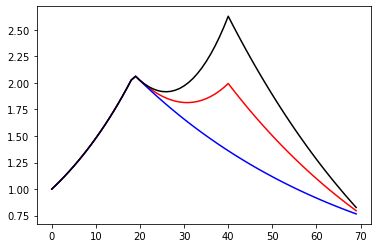

In [26]:
plt.plot(consumo2a,'red')
plt.plot(consumo2b,'blue')
plt.plot(consumo2c,'black')
plt.savefig("9_Nuevos_Consumos.pdf", format='pdf', dpi=80)

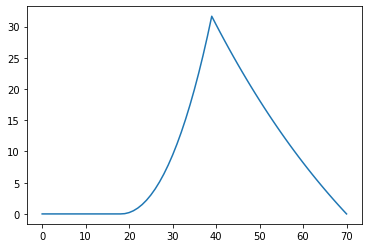

In [27]:
plt.plot(resultados2)
plt.savefig("10_Nueva_senda.pdf", format='pdf', dpi=80)

## Asuma que Yt es un proceso AR(1)
### Y1=mu=1 rho=0.8 y SD eps =0.2

In [28]:
#Función que simula el proceso AR(1)
mediaeps=0
sigmaeps=0.2
mu=1
rho=0.8
y0=1

random.seed(5)
epsilon=np.random.normal(mediaeps,sigmaeps**2,T)

def AR1(rho,mu,y0,nT,epsilon):
    y=np.ones(T)
    y[0] = y0
    
    for t in range(1,nT):
        y[t]=mu*(1-rho)+rho*y[t-1]+epsilon[t]
    return(y)    

In [29]:
#Generamos el proceso AR1 para el ingreso
y_sim=AR1(rho,mu,y0,T,epsilon)

## Inciso a

In [30]:
#Senda del consumo cuando phi tiende a infinito (no restricción de deuda)
X0=A_initval #Damos un valor inicial al vector de activos
resultados=minimize(messi_func,X0).x #Generamos resultados 
resultados=np.append(resultados,A_T) #Generamos un vector de optimos

#Veamos el consumo de Leo
consumo_y=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

for t in range(T):
    if (t==0):
        consumo_y[0] = A_0*R1+y_sim[0]-resultados[0]

    else:
        consumo_y[t] = resultados[t-1]*R1+y_sim[t]-resultados[t]

#Consumo de Messi para los 70 períodos, si estamos en el período 
#inicial, entonces el consumo, es el vector de activos iniciales
#En su valor presente, más los ingresos en ese período, menos 
#El vector de optimos del resultado de la minimización de la función


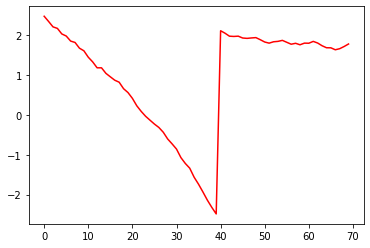

In [31]:
#Veamos la Senda de consumo
plt.plot(consumo_y,"red")
plt.savefig("11_Senda_Consumo.pdf", format='pdf', dpi=80)

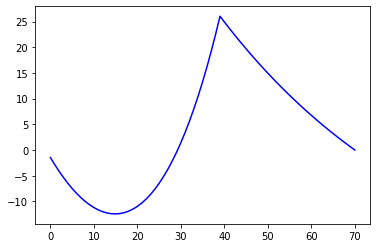

In [32]:
#veamos la senda de ahorro
plt.plot(resultados,"blue")
plt.savefig("12_Senda_ahorro.pdf", format='pdf', dpi=80)

## Inciso b

In [34]:
A_bound = 0

x0=np.ones(len(A_initval))

for i in range(len(A_initval)):
    x0[i]=max(A_bound,A_initval[i])
    
li = np.repeat(A_bound,len(x0))    
ls=np.repeat(None,len(x0))
lims=np.vstack((li,ls)).T


resultados2= minimize(messi_func,x0, method="L-BFGS-B", bounds= lims).x
resultados2= np.append(resultados2,A_T)

#Veamos el consumo de Messi

consumoy2=np.ones(T)

for t in range(0,T):
    if (t==0):
        consumoy2[0] = A_0*R1+y_sim[0]-consumoy2[0]
    else:
        consumoy2[t] = resultados2[t-1]*R1+y_sim[t]-resultados2[t]

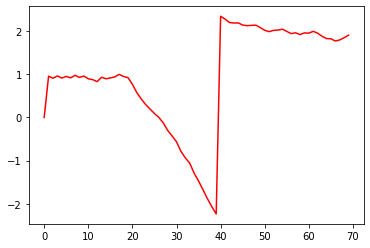

In [35]:
#Veamos la Senda de consumo
plt.plot(consumoy2,"red")
plt.savefig("13_Mas_Consumos.pdf", format='pdf', dpi=80)

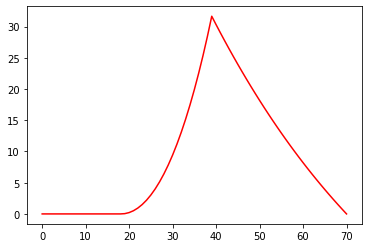

In [36]:
#Veamos la senda de ahorro
plt.plot(resultados2,"red")
plt.savefig("14_Mas_ahorros.pdf", format='pdf', dpi=80)

# Repita los dos puntos anteriores para 10k realizaciones de Yt

In [37]:
# veamos de primero las 10k realizaciones
iteraciones = 10000 #Numero de simulaciones
simulacion={} #Diccionario vacío donde voy a guardar las sims

X0=A_initval #Damos un valor inicial al vector de activos
resultados=minimize(messi_func,X0).x #Generamos resultados 
resultados=np.append(resultados,A_T) #Generamos un vector de optimos

for k in range(iteraciones): #Loop que me guarda cada realizacion
    
    epsilon=np.random.normal(mediaeps,sigmaeps**2,T)
    y_sim=AR1(rho,mu,y0,T,epsilon)
    
    consumo_y=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

    for t in range(T):
        if (t==0):
            consumo_y[0] = A_0*R1+y_sim[0]-resultados[0]

        else:
            consumo_y[t] = resultados[t-1]*R1+y_sim[t]-resultados[t]
     
    simulacion[k]=consumo_y

In [38]:
consumos=[]
for k in simulacion:
    elemento=simulacion[k]
    for i in elemento:
        consumos.append(i)
mat=np.array(consumos).reshape(iteraciones,T) #Creamos una matriz con 70 columnas y el numero de iteraciones

In [39]:
consumo=[]
for i in range(0,T):
    ci=(sum(mat[:,i])/iteraciones)
    consumo.append(ci)
con_med=np.array(consumo)
con_med

array([ 2.4701402 ,  2.38245355,  2.29366847,  2.20344796,  2.11267098,
        2.02118917,  1.92831914,  1.83471374,  1.7400434 ,  1.64341804,
        1.54631865,  1.4475261 ,  1.34739346,  1.24561036,  1.14186085,
        1.0359076 ,  0.92798751,  0.8174906 ,  0.70477579,  0.58982661,
        0.47244887,  0.3518862 ,  0.22901481,  0.1022605 , -0.02728253,
       -0.15977115, -0.29643583, -0.43620511, -0.5801267 , -0.72818404,
       -0.88044915, -1.03703559, -1.19764525, -1.36406357, -1.53484246,
       -1.71171046, -1.89378358, -2.08064905, -2.27526048, -2.47504802,
        2.11903313,  2.09780443,  2.07576312,  2.05458678,  2.03382754,
        2.01371401,  1.99325556,  1.97467574,  1.95522129,  1.93646836,
        1.91895664,  1.90128964,  1.88372259,  1.86677968,  1.85029169,
        1.83316052,  1.81632716,  1.80063776,  1.78408602,  1.76851508,
        1.75335862,  1.73794744,  1.72348978,  1.7100506 ,  1.6957785 ,
        1.68261278,  1.66946478,  1.65632226,  1.64328961,  1.63

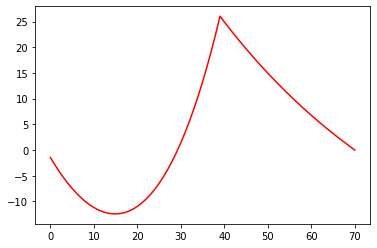

In [41]:
plt.plot(resultados,"red")
plt.savefig("15_Resultados.pdf", format='pdf', dpi=80)

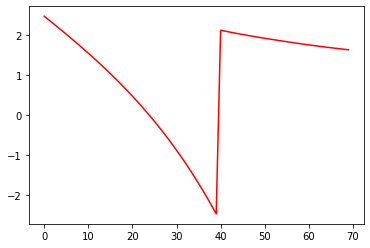

In [42]:
plt.plot(con_med,"red")
plt.savefig("16_Consumo_medio.pdf", format='pdf', dpi=80)

## Con PHI=0

In [43]:
A_bound = 0

x0=np.ones(len(A_initval))

for i in range(len(A_initval)):
    x0[i]=max(A_bound,A_initval[i])
    
li = np.repeat(A_bound,len(x0))    
ls=np.repeat(None,len(x0))
lims=np.vstack((li,ls)).T


resultados2= minimize(messi_func,x0, method="L-BFGS-B", bounds= lims).x
resultados2= np.append(resultados2,A_T)

for k in range(iteraciones): #Loop que me guarda cada realizacion
    
    epsilon=np.random.normal(mediaeps,sigmaeps**2,T)
    y_sim=AR1(rho,mu,y0,T,epsilon)
    
    consumo_y=np.ones(T) #Vector de consumo de los 70 períodos de vida de Messi

    for t in range(T):
        if (t==0):
            consumo_y[0] = A_0*R1+y_sim[0]-resultados2[0]

        else:
            consumo_y[t] = resultados2[t-1]*R1+y_sim[t]-resultados2[t]
     
    simulacion[k]=consumo_y

In [44]:
consumos2=[]
for k in simulacion:
    elemento=simulacion[k]
    for i in elemento:
        consumos2.append(i)
mat2=np.array(consumos2).reshape(iteraciones,T) #Creamos una matriz con 70 columnas y el numero de iteraciones

In [45]:
consumo2=[]
for i in range(0,T):
    ci=(sum(mat2[:,i])/iteraciones)
    consumo2.append(ci)
con_med2=np.array(consumo2)
con_med2

array([ 1.        ,  1.00041664,  1.00048989,  0.99988127,  0.9998193 ,
        1.00031354,  1.00097154,  1.00062345,  1.00020759,  0.99935622,
        0.99949375,  0.99919546,  1.00002658,  1.00014047,  1.00041458,
        1.00032765,  0.99969312,  0.99992111,  0.99987663,  0.95454415,
        0.83027571,  0.70319506,  0.57293073,  0.44027535,  0.30405519,
        0.16522993,  0.02258955, -0.12342108, -0.27305683, -0.42684277,
       -0.58482044, -0.74700917, -0.91490549, -1.0863776 , -1.26243644,
       -1.44464425, -1.63111107, -1.82416397, -2.02328505, -2.22826212,
        2.36172057,  2.33483545,  2.30833913,  2.2829424 ,  2.25849398,
        2.23332925,  2.20939688,  2.18531488,  2.16225232,  2.13919516,
        2.11695428,  2.09484485,  2.07362149,  2.05242582,  2.03132879,
        2.01044184,  1.99045938,  1.97100714,  1.95218528,  1.93346912,
        1.9149265 ,  1.89758698,  1.88040576,  1.86290706,  1.84552164,
        1.82915849,  1.81295746,  1.79714651,  1.78146038,  1.76

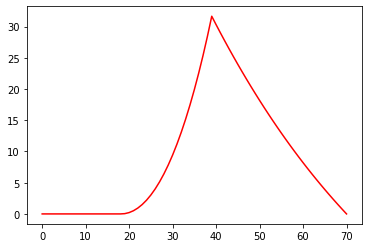

In [48]:
plt.plot(resultados2,"red")
plt.savefig("17_Resultados_2.pdf", format='pdf', dpi=80)

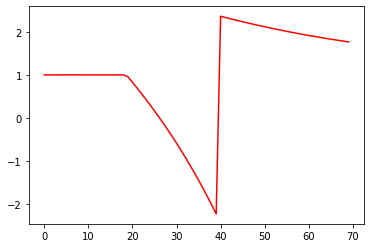

In [49]:
plt.plot(con_med2,"red")
plt.savefig("18_Consumo_medio_2.pdf", format='pdf', dpi=80)